<a href="https://colab.research.google.com/github/IsmaDavidAA/casoberka/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
path = "/content/drive/MyDrive/COLAB-DIPLOMADO/credit_card_candidate_churn_y_update_minable.csv"
df_berka = pd.read_csv(path)

In [55]:
df_berka.head(5)

,type,frequency,account_creation,loan_date,amount,duration,payments,status,churn_y,days_elapsed,adjusted_birth_number,gender,birth_date,age
0,OWNER,POPLATEK MESICNE,930226,940105,80952,24,3373.0,A,1,313,450204,Male,2045-02-04,46
1,DISPONENT,POPLATEK MESICNE,930226,940105,80952,24,3373.0,A,1,313,401009,Female,2040-10-09,41
2,OWNER,POPLATEK MESICNE,950407,960429,30276,12,2523.0,B,0,388,390423,Female,2039-04-23,40
3,OWNER,POPLATEK MESICNE,960728,971208,30276,12,2523.0,A,1,498,620209,Male,2062-02-09,63
4,OWNER,POPLATEK MESICNE,970818,981014,318480,60,5308.0,D,0,422,520826,Male,2052-08-26,53


onehot encoding

In [79]:
# Selecciona las columnas categóricas
categorical_columns = ['type', 'frequency', 'status', 'gender']
quantitative_columns = ['account_creation', 'loan_date', 'amount', 'duration', 'payments', 'days_elapsed', 'adjusted_birth_number','age']
# Extraer componentes de la fecha de nacimiento
df_encoded['birth_year'] = pd.to_datetime(df_encoded['birth_date']).dt.year
df_encoded['birth_month'] = pd.to_datetime(df_encoded['birth_date']).dt.month
df_encoded['birth_day'] = pd.to_datetime(df_encoded['birth_date']).dt.day

# Aplicar one-hot encoding a los componentes de la fecha
df_encoded = pd.get_dummies(df_encoded, columns=['birth_year', 'birth_month', 'birth_day'], prefix=['year', 'month', 'day'])
# Elimina la columna 'birth_date' del DataFrame


# Aplica One-Hot Encoding a las columnas categóricas
df_encoded = pd.get_dummies(df_berka, columns=categorical_columns)
scaler = StandardScaler()
df_encoded[quantitative_columns] = scaler.fit_transform(df_encoded[quantitative_columns])
# Muestra el nuevo DataFrame con One-Hot Encoding
df_encoded = df_encoded.drop('birth_date', axis=1)
df_encoded.head(10)

,account_creation,loan_date,amount,duration,payments,churn_y,days_elapsed,adjusted_birth_number,age,type_DISPONENT,type_OWNER,frequency_POPLATEK MESICNE,frequency_POPLATEK PO OBRATU,frequency_POPLATEK TYDNE,status_A,status_B,status_C,status_D,gender_Female,gender_Male
0,-1.553640,-1.571499,-0.618731,-0.714421,-0.383593,1,-0.530683,-0.999389,-0.000557,0,1,1,0,0,1,0,0,0,0,1
1,-1.553640,-1.571499,-0.618731,-0.714421,-0.383593,1,-0.530683,-1.379265,-0.329526,1,0,1,0,0,1,0,0,0,1,0
2,-0.125888,-0.173429,-1.061287,-1.413623,-0.763497,0,-0.075589,-1.461008,-0.395320,0,1,1,0,0,0,1,0,0,1,0
3,0.604296,0.568049,-1.061287,-1.413623,-0.763497,1,0.591883,0.313362,1.117938,0,1,1,0,0,1,0,0,0,0,1
4,1.318137,1.242596,1.455609,1.383186,0.481249,0,0.130721,-0.454057,0.460000,0,1,1,0,0,0,0,0,1,0,1
5,1.317429,1.201666,-0.358627,0.683984,-0.860038,1,-0.888690,-1.386052,-0.329526,0,1,0,0,1,0,0,1,0,1,0
6,-0.790064,-0.168407,0.123646,-0.714421,1.199492,1,0.974162,-1.073449,-0.066351,0,1,1,0,0,1,0,0,0,1,0
7,0.588519,0.540671,-0.427268,-1.413623,1.940530,1,0.373438,-1.231631,-0.197938,0,1,1,0,0,1,0,0,0,0,1
8,0.588519,0.540671,-0.427268,-1.413623,1.940530,1,0.373438,-1.688825,-0.592701,1,0,1,0,0,1,0,0,0,1,0
9,0.574723,0.567912,0.991361,-0.015218,1.402853,0,1.429256,0.704952,1.446907,0,1,1,0,0,0,0,0,1,0,1


#RANDOM FOREST

Precisión del modelo: 0.91
AUC del modelo: 0.75


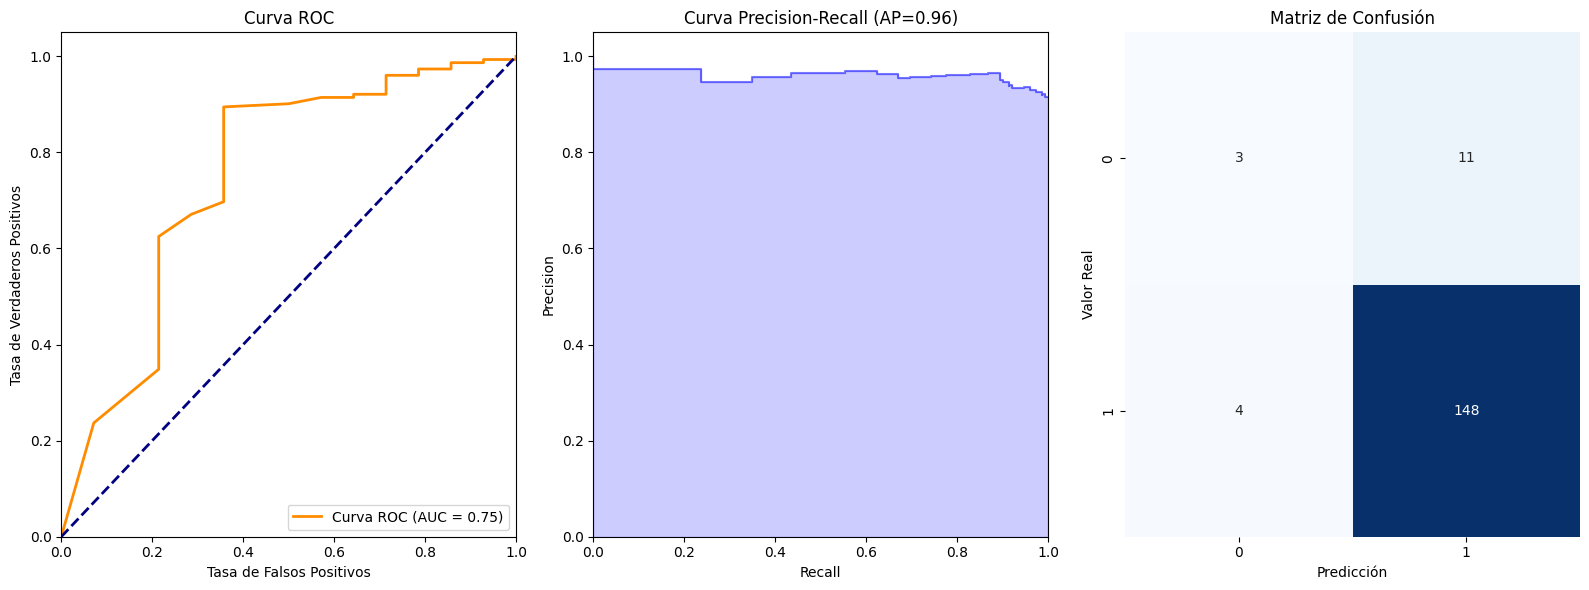

In [114]:

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded[['amount', 'duration', 'payments','days_elapsed']]
y = df_encoded["churn_y"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest con los datos preprocesados
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular el AUC (Área bajo la curva ROC) del modelo
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC del modelo: {roc_auc:.2f}")

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Crea una figura con dos subplots en una fila
plt.figure(figsize=(16, 6))

# Subplot 1: Curva ROC
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Subplot 2: Curva Precision-Recall
plt.subplot(1, 3, 2)
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (AP={0:0.2f})'.format(average_precision))

# Subplot 3: Matriz de Confusión
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()

Precisión del modelo: 0.90
AUC del modelo: 0.76


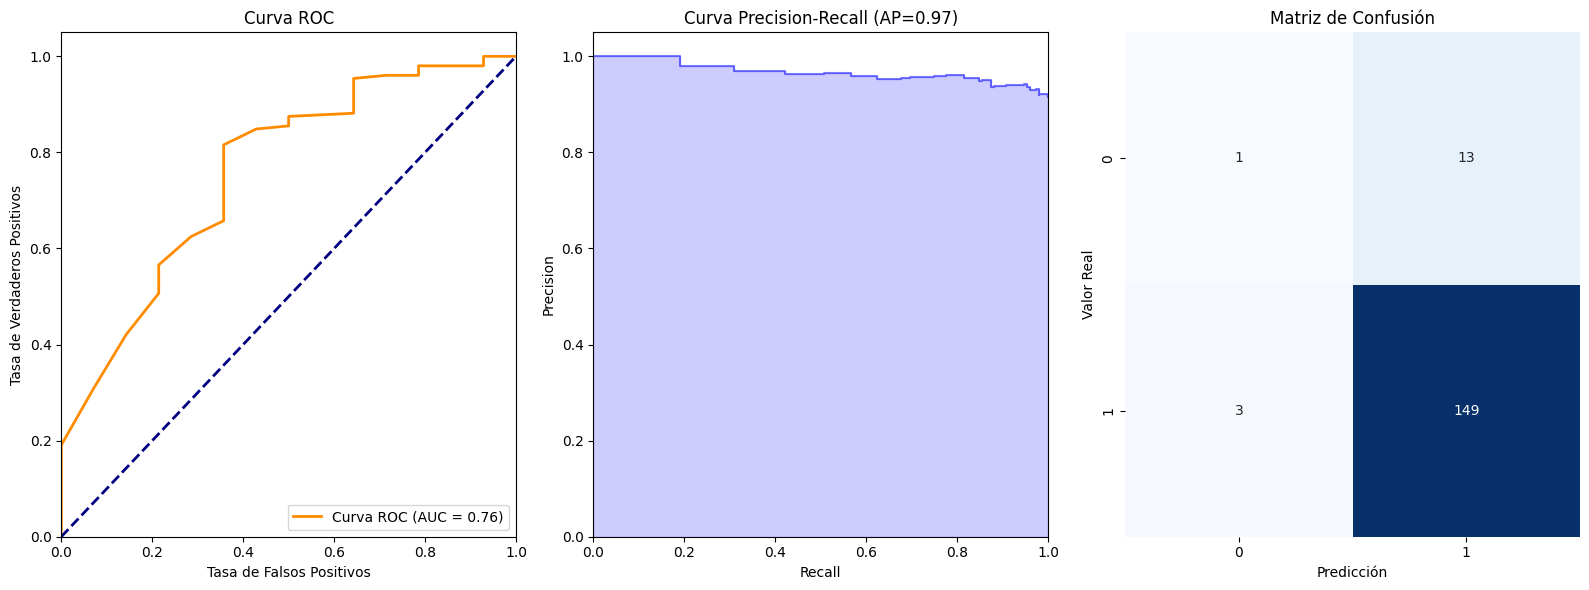

In [115]:

# Definir las características (X) y la variable objetivo (y)
X = df_encoded[['amount', 'duration', 'payments', 'days_elapsed', 'type_OWNER',
                'frequency_POPLATEK MESICNE', 'frequency_POPLATEK PO OBRATU',
                'frequency_POPLATEK TYDNE', 'gender_Female', 'gender_Male']]
y = df_encoded["churn_y"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest con los datos preprocesados
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular el AUC (Área bajo la curva ROC) del modelo
y_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC del modelo: {roc_auc:.2f}")

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Crea una figura con dos subplots en una fila
plt.figure(figsize=(16, 6))

# Subplot 1: Curva ROC
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Subplot 2: Curva Precision-Recall
plt.subplot(1, 3, 2)
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (AP={0:0.2f})'.format(average_precision))

# Subplot 3: Matriz de Confusión
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()

#REGRESION LOGISTICA

Precisión del modelo: 0.91
AUC del modelo: 0.75


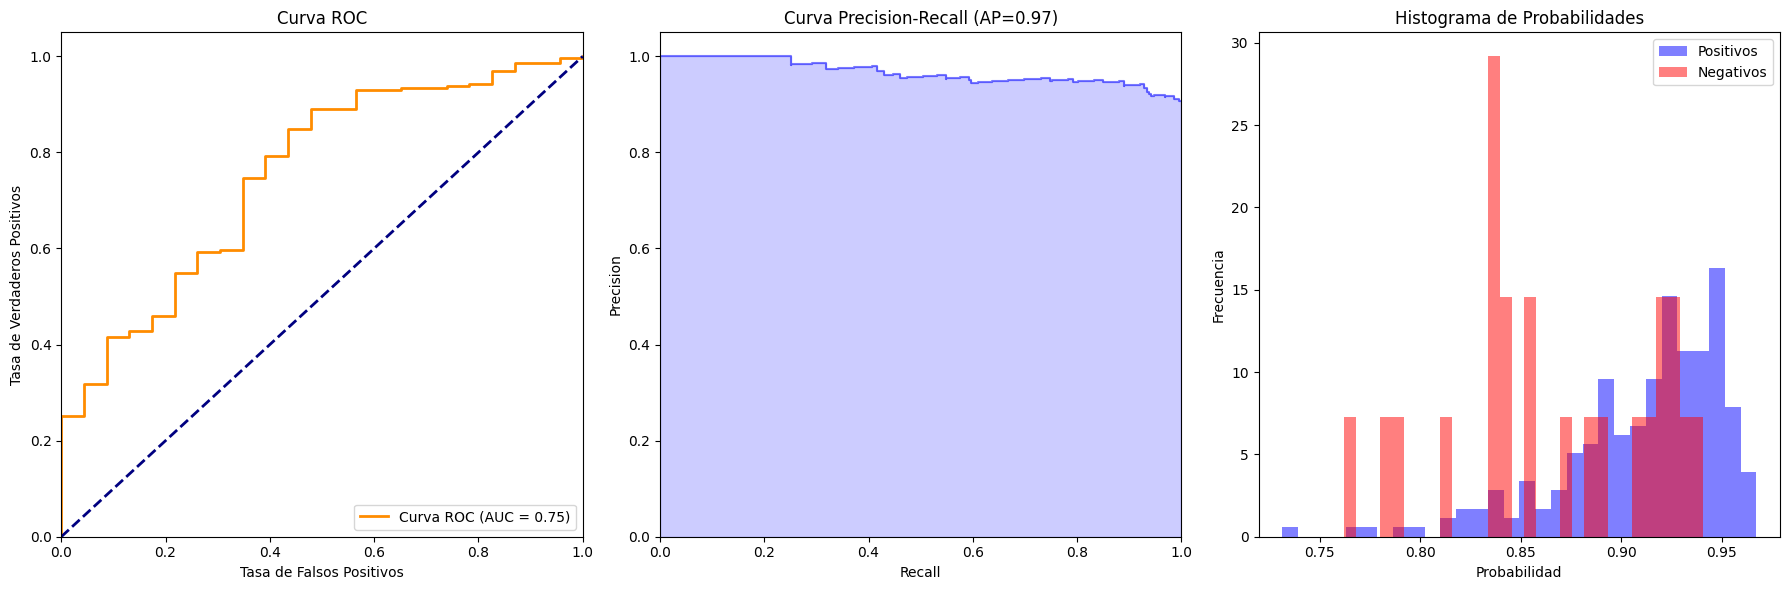

In [116]:

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded[['amount', 'duration', 'payments','days_elapsed']]
y = df_encoded["churn_y"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Regresión Logística con los datos preprocesados
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular el AUC (Área bajo la curva ROC) del modelo
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC del modelo: {roc_auc:.2f}")
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Crea una figura con tres subplots en una fila
plt.figure(figsize=(18, 6))

# Subplot 1: Curva ROC
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Subplot 2: Curva Precision-Recall
plt.subplot(1, 3, 2)
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (AP={0:0.2f})'.format(average_precision))

# Subplot 3: Histograma de probabilidades
plt.subplot(1, 3, 3)
plt.hist(y_prob[y_test == 1], bins=30, color='blue', alpha=0.5, label='Positivos', density=True)
plt.hist(y_prob[y_test == 0], bins=30, color='red', alpha=0.5, label='Negativos', density=True)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades')
plt.legend()

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()

Precisión del modelo con variables categóricas: 0.92
AUC del modelo con variables categóricas: 0.75


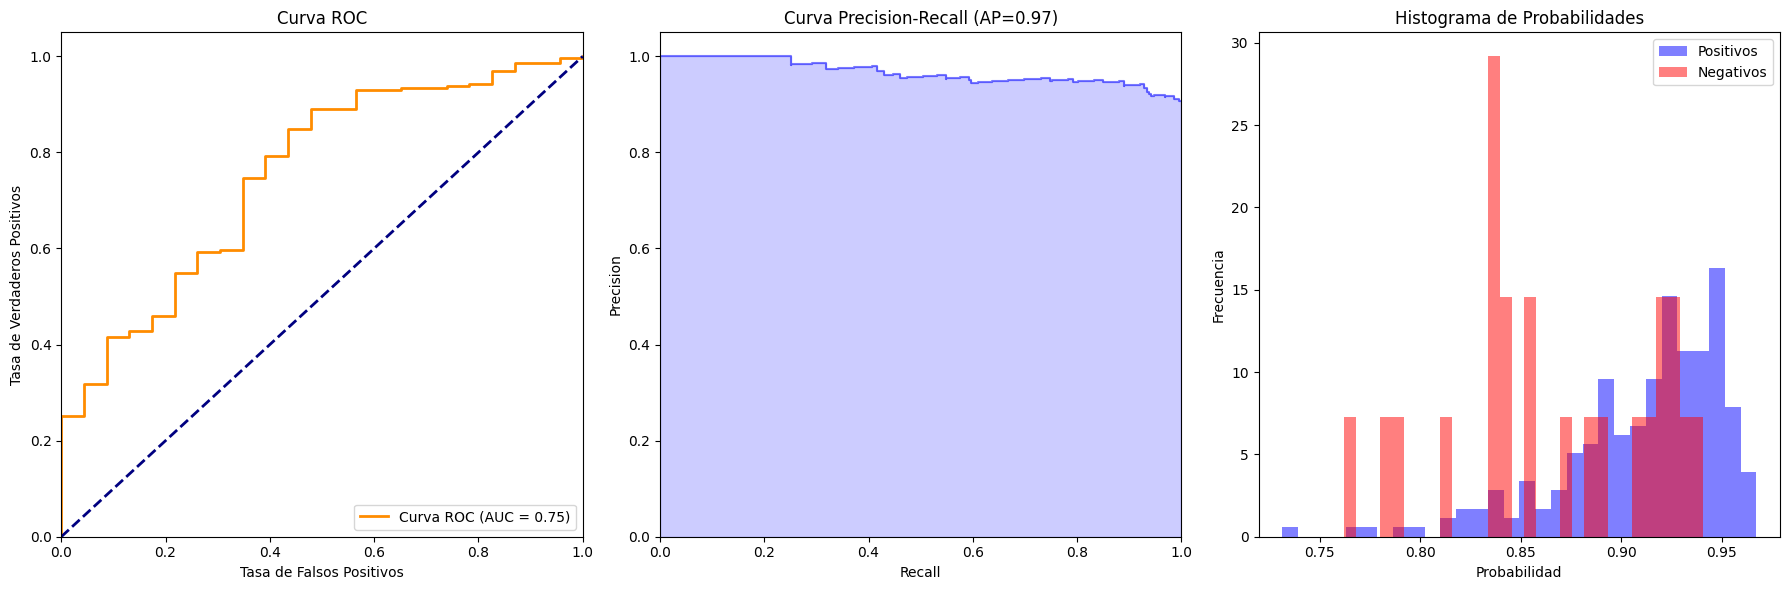

In [117]:
# Selecciona las columnas categóricas
X_categorical = df_encoded[['amount', 'duration', 'payments', 'days_elapsed', 'type_OWNER',
                'frequency_POPLATEK MESICNE', 'frequency_POPLATEK PO OBRATU',
                'frequency_POPLATEK TYDNE', 'gender_Female', 'gender_Male']]
y_categorical = df_encoded["churn_y"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train_categorical, X_test_categorical, y_train_categorical, y_test_categorical = train_test_split(
    X_categorical, y_categorical, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo de Regresión Logística con los datos preprocesados
logistic_model_categorical = LogisticRegression(random_state=42)
logistic_model_categorical.fit(X_train_categorical, y_train_categorical)

# Realizar predicciones en el conjunto de prueba
y_pred_categorical = logistic_model_categorical.predict(X_test_categorical)

# Calcular la precisión del modelo
accuracy_categorical = accuracy_score(y_test_categorical, y_pred_categorical)
print(f"Precisión del modelo con variables categóricas: {accuracy_categorical:.2f}")

# Calcular el AUC (Área bajo la curva ROC) del modelo
y_prob_categorical = logistic_model_categorical.predict_proba(X_test_categorical)[:, 1]
roc_auc_categorical = roc_auc_score(y_test_categorical, y_prob_categorical)
print(f"AUC del modelo con variables categóricas: {roc_auc_categorical:.2f}")

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Crea una figura con tres subplots en una fila
plt.figure(figsize=(18, 6))

# Subplot 1: Curva ROC
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Subplot 2: Curva Precision-Recall
plt.subplot(1, 3, 2)
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (AP={0:0.2f})'.format(average_precision))

# Subplot 3: Histograma de probabilidades
plt.subplot(1, 3, 3)
plt.hist(y_prob[y_test == 1], bins=30, color='blue', alpha=0.5, label='Positivos', density=True)
plt.hist(y_prob[y_test == 0], bins=30, color='red', alpha=0.5, label='Negativos', density=True)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades')
plt.legend()

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()


Precisión del modelo con todas las variables: 0.92
AUC del modelo con todas las variables: 0.79


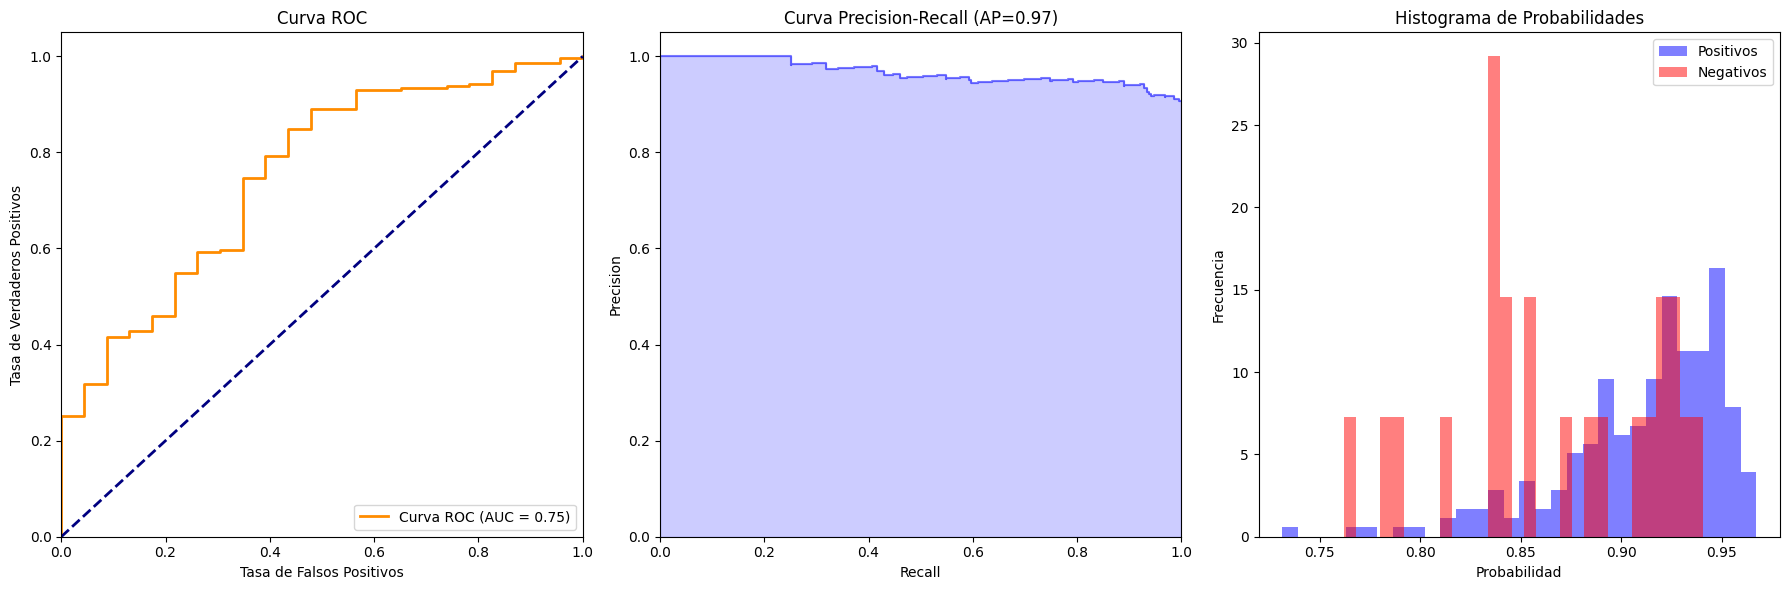

In [118]:
# Selecciona todas las columnas excepto "churn_y" en X
X_all_features = df_encoded.drop(['status_A', 'status_B', 'status_C',
                'status_D', "churn_y", "gender_Female", "gender_Male", "adjusted_birth_number", "age"], axis=1)
y_all_features = df_encoded["churn_y"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train_all_features, X_test_all_features, y_train_all_features, y_test_all_features = train_test_split(
    X_all_features, y_all_features, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo de Regresión Logística con todas las características
logistic_model_all_features = LogisticRegression(random_state=42)
logistic_model_all_features.fit(X_train_all_features, y_train_all_features)

# Realizar predicciones en el conjunto de prueba
y_pred_all_features = logistic_model_all_features.predict(X_test_all_features)

# Calcular la precisión del modelo
accuracy_all_features = accuracy_score(y_test_all_features, y_pred_all_features)
print(f"Precisión del modelo con todas las variables: {accuracy_all_features:.2f}")

# Calcular el AUC (Área bajo la curva ROC) del modelo
y_prob_all_features = logistic_model_all_features.predict_proba(X_test_all_features)[:, 1]
roc_auc_all_features = roc_auc_score(y_test_all_features, y_prob_all_features)
print(f"AUC del modelo con todas las variables: {roc_auc_all_features:.2f}")

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Crea una figura con tres subplots en una fila
plt.figure(figsize=(18, 6))

# Subplot 1: Curva ROC
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Subplot 2: Curva Precision-Recall
plt.subplot(1, 3, 2)
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (AP={0:0.2f})'.format(average_precision))

# Subplot 3: Histograma de probabilidades
plt.subplot(1, 3, 3)
plt.hist(y_prob[y_test == 1], bins=30, color='blue', alpha=0.5, label='Positivos', density=True)
plt.hist(y_prob[y_test == 0], bins=30, color='red', alpha=0.5, label='Negativos', density=True)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades')
plt.legend()

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()


#ARBOL DE DECISIONES

Precisión del modelo: 0.86
AUC del modelo: 0.53


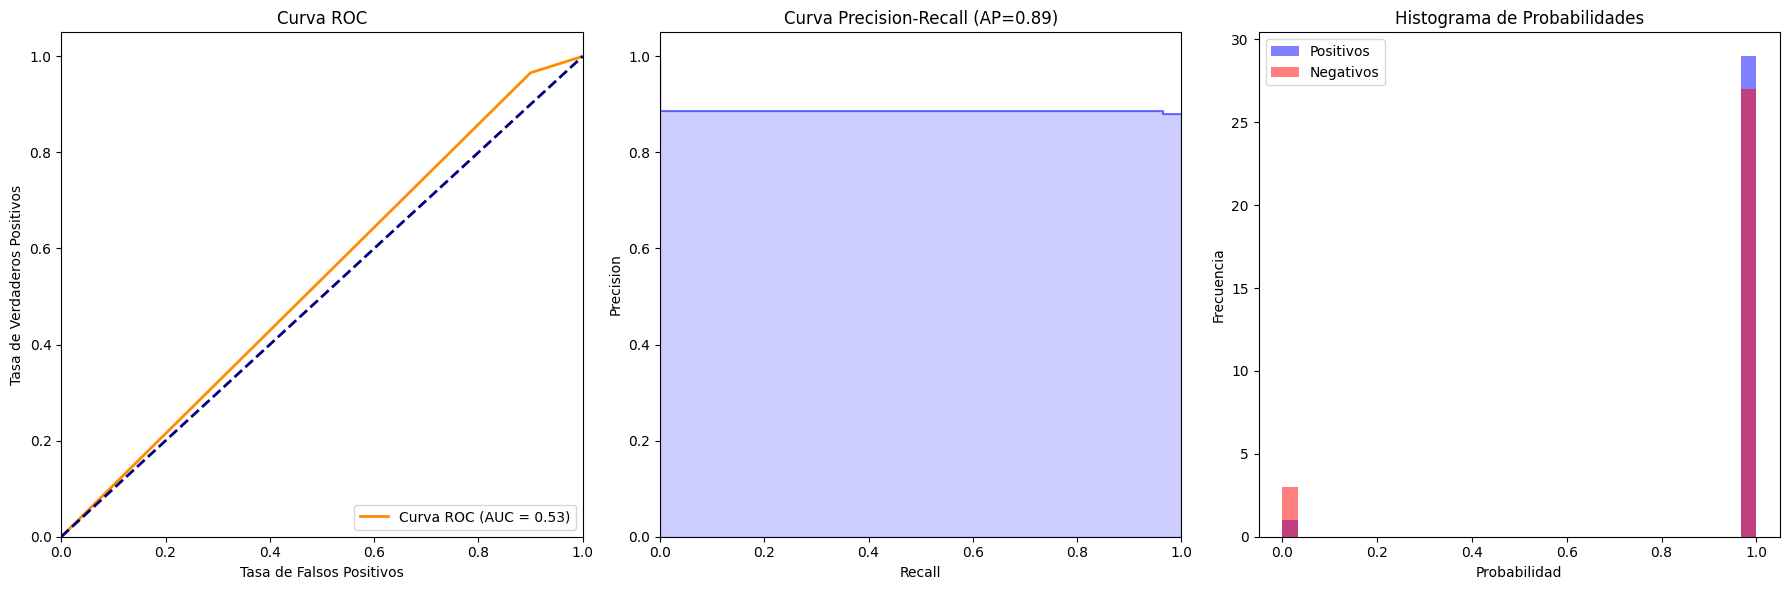

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded[['amount', 'duration', 'payments', 'days_elapsed']]
y = df_encoded["churn_y"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Crear y entrenar el modelo de Árbol de Decisiones con los datos preprocesados
tree_model = DecisionTreeClassifier(random_state=22)
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular el AUC (Área bajo la curva ROC) del modelo
y_prob = tree_model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC del modelo: {roc_auc:.2f}")

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Crea una figura con tres subplots en una fila
plt.figure(figsize=(18, 6))

# Subplot 1: Curva ROC
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Subplot 2: Curva Precision-Recall
plt.subplot(1, 3, 2)
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (AP={0:0.2f})'.format(average_precision))

# Subplot 3: Histograma de probabilidades
plt.subplot(1, 3, 3)
plt.hist(y_prob[y_test == 1], bins=30, color='blue', alpha=0.5, label='Positivos', density=True)
plt.hist(y_prob[y_test == 0], bins=30, color='red', alpha=0.5, label='Negativos', density=True)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades')
plt.legend()

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()

Precisión del modelo: 0.91
AUC del modelo: 0.34


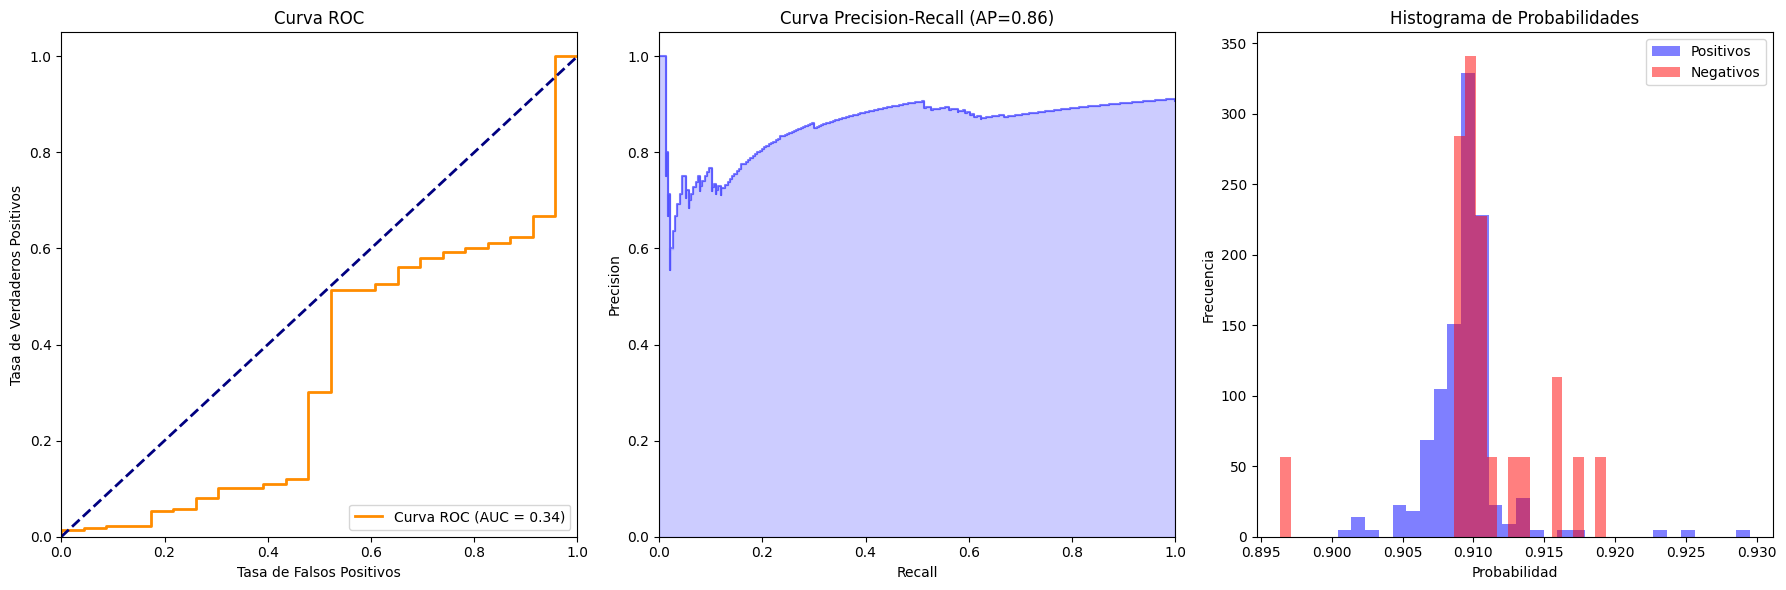

In [120]:

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded[['amount', 'duration', 'payments', 'days_elapsed']]
y = df_encoded["churn_y"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Máquinas de Vectores de Soporte (SVM) con los datos preprocesados
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular el AUC (Área bajo la curva ROC) del modelo
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC del modelo: {roc_auc:.2f}")
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Crea una figura con tres subplots en una fila
plt.figure(figsize=(18, 6))

# Subplot 1: Curva ROC
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Subplot 2: Curva Precision-Recall
plt.subplot(1, 3, 2)
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (AP={0:0.2f})'.format(average_precision))

# Subplot 3: Histograma de probabilidades
plt.subplot(1, 3, 3)
plt.hist(y_prob[y_test == 1], bins=30, color='blue', alpha=0.5, label='Positivos', density=True)
plt.hist(y_prob[y_test == 0], bins=30, color='red', alpha=0.5, label='Negativos', density=True)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades')
plt.legend()

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()

#Redes Neuronales Artificiales

Epoch 1/10
8/8 [==============================] - 3s 66ms/step - loss: 0.7284 - accuracy: 0.5546 - val_loss: 0.6408 - val_accuracy: 0.8992
Epoch 2/10
8/8 [==============================] - 0s 14ms/step - loss: 0.6503 - accuracy: 0.6597 - val_loss: 0.6260 - val_accuracy: 0.8739
Epoch 3/10
8/8 [==============================] - 0s 33ms/step - loss: 0.6137 - accuracy: 0.7038 - val_loss: 0.6098 - val_accuracy: 0.8992
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 0.5732 - accuracy: 0.7878 - val_loss: 0.5914 - val_accuracy: 0.8992
Epoch 5/10
8/8 [==============================] - 0s 13ms/step - loss: 0.5454 - accuracy: 0.8151 - val_loss: 0.5721 - val_accuracy: 0.8992
Epoch 6/10
8/8 [==============================] - 0s 25ms/step - loss: 0.5158 - accuracy: 0.8508 - val_loss: 0.5563 - val_accuracy: 0.8992
Epoch 7/10
8/8 [==============================] - 0s 30ms/step - loss: 0.4918 - accuracy: 0.8697 - val_loss: 0.5441 - val_accuracy: 0.8992
Epoch 8/10
8/8 [===========

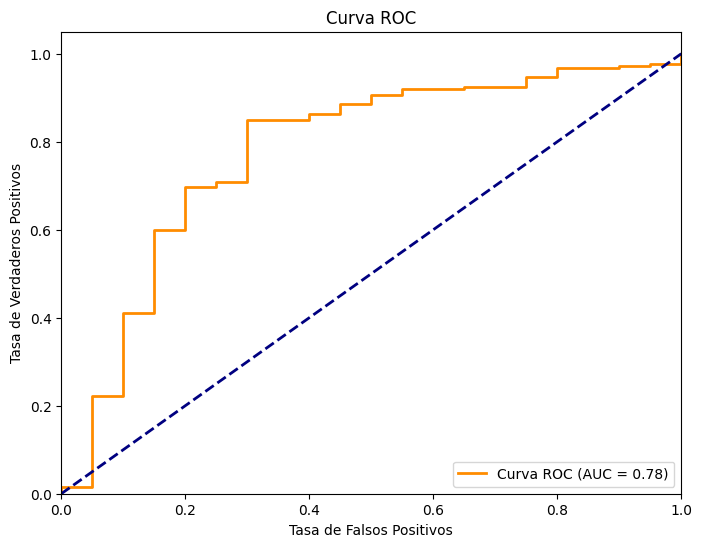

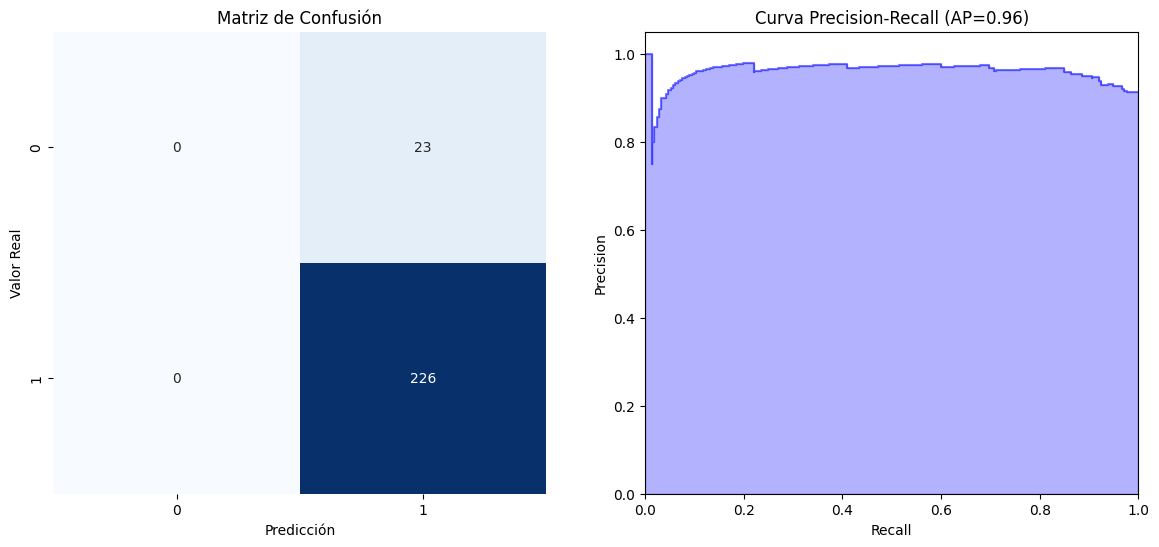

In [122]:

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_encoded[['amount', 'duration', 'payments', 'days_elapsed']]
y = df_encoded["churn_y"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Normalizar las características (escalar)
scaler = tf.keras.layers.experimental.preprocessing.Normalization()
scaler.adapt(X_train)

# Crear y entrenar el modelo de Redes Neuronales Artificiales (ANN)
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular el AUC (Área bajo la curva ROC) del modelo
y_prob = model.predict(X_test).flatten()  # Probabilidad de clase positiva
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC del modelo: {roc_auc:.2f}")

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Crear la figura
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Calcular la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Histograma de probabilidades positivas (clase positiva)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Graficar la curva Precision-Recall
plt.subplot(1, 2, 2)
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (AP={0:0.2f})'.format(average_precision))

plt.show()